## 1. Loading libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np

## 2. Import of data

In [3]:
# Load the data

df = pd.read_csv('data/processed/final_df.csv')

# Check the data

df.head()

,ID,ADDRESS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,STATUS
0,5008804,"06042, CT, 31 Mitchell Road",M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,1
1,5008804,"06042, CT, 31 Mitchell Road",F,N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,...,-3659.0,1.0,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,1
2,5008805,"72703, AR, 1189 Northwest End Avenue",M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,1
3,5008805,"72703, AR, 1189 Northwest End Avenue",M,N,Y,0.0,180000.0,Working,Higher education,Civil marriage,...,-390.0,1.0,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,1
4,5008806,"72701, AR, 218 Shipley Alley",M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,...,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,0


## 3. Data processing

We look at the types of values in the df.

In [13]:
# Type of values in df.

df.dtypes

ID                       int64
ADDRESS                 object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
DAYS_BIRTH_CLEAN        object
Letter                  object
STATUS                   int64
dtype: object

For ethical and EU regulatory reasons we removed the sensitive variable related to gender.

In [4]:
# Drop the CODE_GENDER column. It is not needed for the analysis

df = df.drop('CODE_GENDER', axis=1)

Checking for null and duplicate values

In [5]:
# Check the null values

df.isnull().sum()

ID                         0
ADDRESS                    0
FLAG_OWN_CAR             910
FLAG_OWN_REALTY          904
CNT_CHILDREN             902
AMT_INCOME_TOTAL         875
NAME_INCOME_TYPE         931
NAME_EDUCATION_TYPE      939
NAME_FAMILY_STATUS       904
NAME_HOUSING_TYPE        902
DAYS_EMPLOYED            922
FLAG_MOBIL               870
FLAG_WORK_PHONE          926
FLAG_PHONE               952
FLAG_EMAIL               901
OCCUPATION_TYPE        12007
CNT_FAM_MEMBERS          845
DAYS_BIRTH_CLEAN         887
Letter                     0
STATUS                     0
dtype: int64

In [6]:
# Check the number of duplicates

df.duplicated().sum()

5

In [11]:
# Check the number of duplicates

print('There are '+ str(df.duplicated().sum()) + ' duplicates in the dataset.')

# Drop the duplicates

df = df.drop_duplicates()

There are 0 duplicates in the dataset.


### 3.1 Treatment of nulls

Since there are different types of occupancy types we will group the NAs into a new group, `Others`.

In [12]:
# SHow the rows with null values

df[df.isnull().any(axis=1)]

# Replace the null values of Occupation_type with 'Other'

df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')

# Check the null values

df.isnull().sum()

ID                       0
ADDRESS                  0
FLAG_OWN_CAR           910
FLAG_OWN_REALTY        904
CNT_CHILDREN           902
AMT_INCOME_TOTAL       875
NAME_INCOME_TYPE       931
NAME_EDUCATION_TYPE    939
NAME_FAMILY_STATUS     904
NAME_HOUSING_TYPE      902
DAYS_EMPLOYED          922
FLAG_MOBIL             870
FLAG_WORK_PHONE        926
FLAG_PHONE             952
FLAG_EMAIL             901
OCCUPATION_TYPE          0
CNT_FAM_MEMBERS        845
DAYS_BIRTH_CLEAN       887
Letter                   0
STATUS                   0
dtype: int64

We drop the null rows of the variables 'NAME_FAMILY_STATUS', 'DAYS_BIRTH_CLEAN'.

In [14]:
# Drop the rows with null values in the following columns NAME_FAMILY_STATUS, DAYS_BIRTH_CLEAN.

df = df.dropna(subset=['NAME_FAMILY_STATUS', 'DAYS_BIRTH_CLEAN'])

Treatment of the rest of the variables.

In [15]:
# Convert NAME_INCOME_TYPE to numeric.

df['AMT_INCOME_TOTAL'] = pd.to_numeric(df['AMT_INCOME_TOTAL'], errors='coerce')

# When CNT_CHILDREN is null replace by 0

df['CNT_CHILDREN'] = df['CNT_CHILDREN'].fillna(0)

# For FLAG_OWN_CAR and FLAG_OWN_REALTY, FLAG_MOBILE, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS replace the null values with 0

df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].fillna(0)
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].fillna(0)
df['FLAG_MOBIL'] = df['FLAG_MOBIL'].fillna(0)
df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].fillna(0)
df['FLAG_PHONE'] = df['FLAG_PHONE'].fillna(0)
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].fillna(0)
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(0)

# For  AMT_INCOME_TOTAL,  replace the null values with the most repated value.

df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].fillna(df['AMT_INCOME_TOTAL'].mode()[0])

# Drop values with null values in NAME_INCOME_TYPE, NAME_HOUSING_TYPE, DAYS_EMPLOYED

df = df.dropna(subset=['NAME_INCOME_TYPE', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE'])

# Check the null values

df.isnull().sum()

ID                     0
ADDRESS                0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
DAYS_BIRTH_CLEAN       0
Letter                 0
STATUS                 0
dtype: int64

In [16]:
# Head of df

df.head()

,ID,ADDRESS,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,STATUS
0,5008804,"06042, CT, 31 Mitchell Road",Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,Other,2.0,09/04/1990,L,1
1,5008804,"06042, CT, 31 Mitchell Road",N,Y,1.0,90000.0,State servant,Secondary / secondary special,Married,House / apartment,-3659.0,1.0,0.0,0.0,0.0,Medicine staff,3.0,07/06/1984,L,1
2,5008805,"72703, AR, 1189 Northwest End Avenue",Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,Other,2.0,09/04/1990,G,1
3,5008805,"72703, AR, 1189 Northwest End Avenue",N,Y,0.0,180000.0,Working,Higher education,Civil marriage,With parents,-390.0,1.0,0.0,0.0,0.0,Sales staff,2.0,21/02/1995,G,1
4,5008806,"72701, AR, 218 Shipley Alley",Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,0


### Exploratory analysis

### 4.1 Target Variable

During the pre-processing stage we indicated that the variable STATUS was to be the target variable, (0 - Good payer, 1- Bad payer).

<AxesSubplot:>

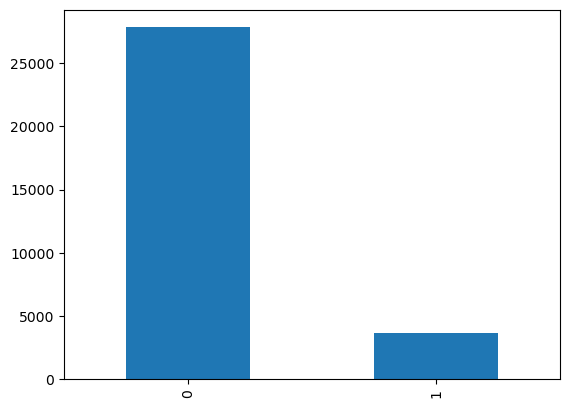

In [43]:
# Graphic of the STATUS column

df['STATUS'].value_counts().plot(kind='bar')

We note that the target variable is very unbalanced, which will have to be taken into account when creating the model and selecting the metric.

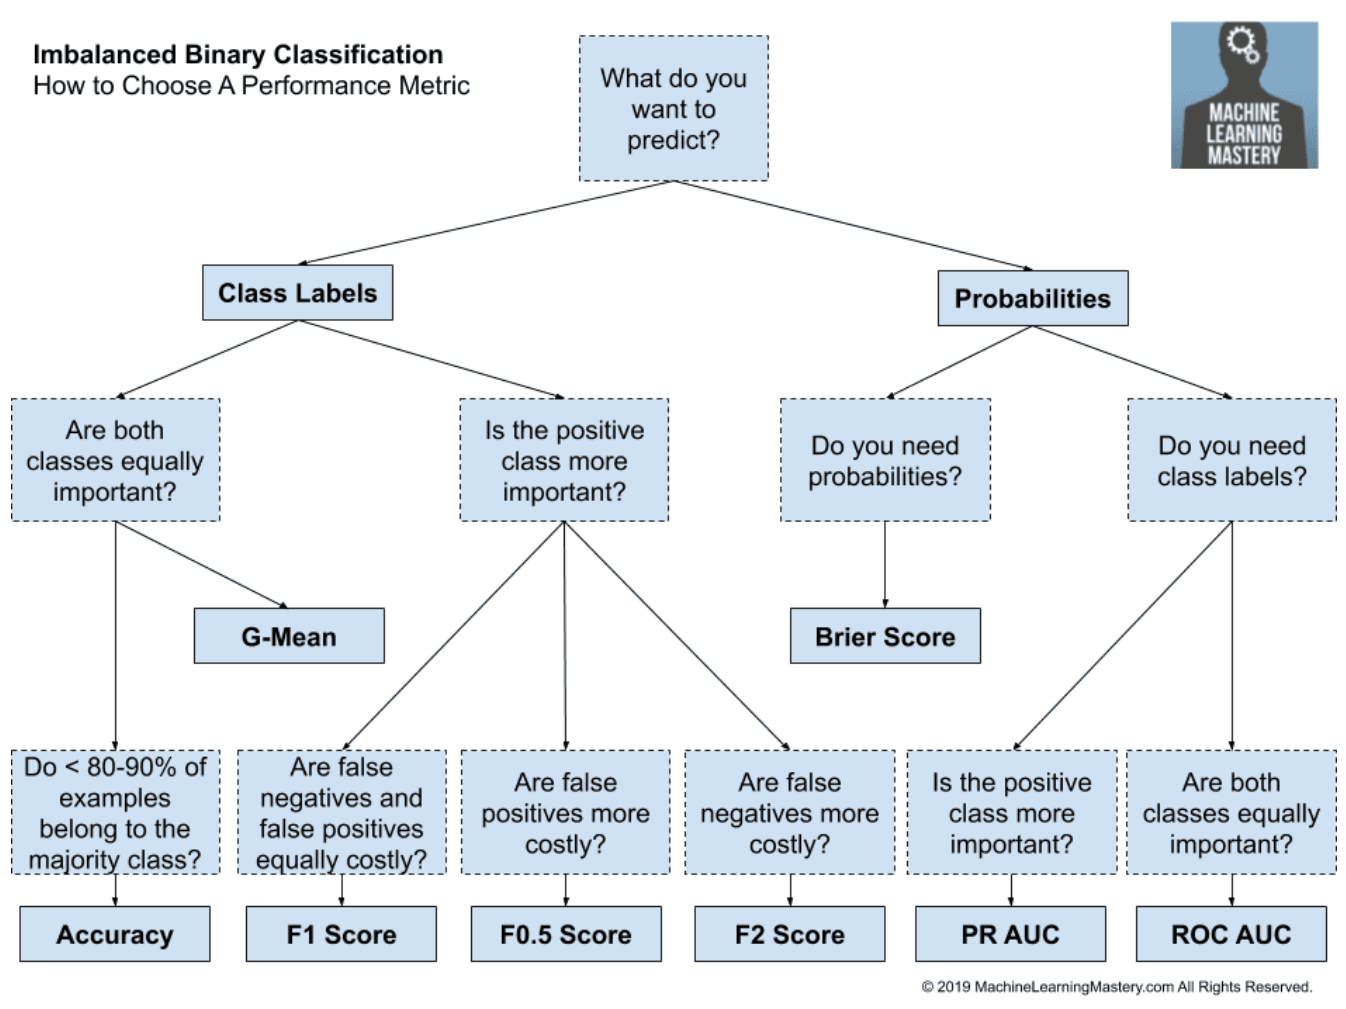

### 4.2. Rest of the variables (Carried out in separate Power BI together with the Outliers analysis)

### 5. Export of DF

In [44]:
# Save as csv

df.to_csv('data/processed/final_df_EDA.csv', index=False)